
# HYPERUNIFORMITY NUMERICAL PROJECT - Question 1 #
Monroy Merida Diana Laura, Candellone Elena, Ghivarello Sara, Pierannunzi Elena  

In [8]:
#import useful packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy import random
import time

# Matrix generation
generate a matrix of size 2L x 2L (our matrix L x L with an outer shell that is needed in order to take into account PBC)

the matrix is constucted in such a way that in every position there are the coordinates of the particle

EXAMPLE for L = 1:

$$ a = create(1) =  \begin{bmatrix}
[0,0] & [0,1] \\
[1,0] & [1,1] 
\end{bmatrix}  $$

In [9]:
def create(L) :
    return [[x_0,x_1] for x_0 in range(2*L) for x_1 in range(2*L)]

# Distance between patricles

Takes a point $x_0$ and a matrix. Returns an array that contains the distances between all points of the matrix and $x_0$.

i.e. $$ arr\_dist = [distance(x_0,x_1),distance(x_0,x_2) ...]$$

In [10]:
def distance(x_0,matrix):
#arrays with all x and y coordinates of matrix elements
    x = [sites[0] for sites in matrix]
    y = [sites[1] for sites in matrix]
    delta_x = [abs(x_0[0]-i) for i in x]
    delta_y = [abs(x_0[1]-j) for j in y]
#store all the distances into an array
    arr_dist = [(delta_x[i]**2 + delta_y[i]**2)**(1/2) for i in range(len(delta_x))]
    return arr_dist

# Radii generation
Generate an array, given the size of the matrix L and the number of steps, with

$$ \{r\} \mid r \in [0.1,L/2] $$ with a certain number of values (steps)

In [11]:
def radii(L, steps):
    radius = np.linspace(0.1,L/2,num=steps)
    return radius

# Center random generation
Choose randomly a center $x_0$ inside the matrix of size L x L

Generate an array with n values of $x_0$

In [12]:
def x_0(L):                                                                              
    x = random.uniform(round(L/2),round(3*L/2))
    y = random.uniform(round(L/2),round(3*L/2))
    center = [x,y]
    return center

def vec_x0(L,n):
    v = [x_0(L) for i in range(n)]
    return v

# Count the neighbours
This function counts how many particles are into a certain distance from the center $x_0$.

In particular, we give as a parameter an array of radii and we store in the array counts all the countings for each radius.
i.e. $$count = [ count\_R(r1), count\_R(r2) ... ]$$

In [13]:
def count(x_0,mat,radius):
    L = len(mat)
    dist = distance(x_0,mat)
    d = np.array(dist)
    counts = []
    for R in radius:
        count_R = np.count_nonzero(d <= R)
        counts.append(count_R)
    return counts

Generate an matrix (array of arrays) with the countings for each value of x_0 (take n of them).
The matrix will have rows determined by $\{x_0\}$ and columns determined by $\{R\}$

In [14]:
def arr_counts(L,n,radius,mat):
    v = vec_x0(L,n)
    arr = [count(x0,mat,radius) for x0 in v]
    return arr

# Calculate the rescaled variance
This functions takes the size L, the number n of $x_0$'s, the set of radii and the matrix in order to calculate the rescaled variance $$\frac{\sigma(R)^2}{R^2 }= \frac{\langle N(R)^2 \rangle - \langle N(R) \rangle^2}{R^2}$$
For each size L an array of variances is created.

In [15]:
def variance(L,n,radius,mat):
    arr = arr_counts(L,n,radius,mat)
    m = np.array(arr)
    arr_var = []
    for i in range(len(radius)):
        mom = np.power(m[:,i],2)
        var = (np.average(mom)-np.power(np.average(m[:,i]),2))/radius[i]**2
        arr_var.append(var)
    return arr_var

# 1.1
_Write a simple code displaying point particles on a square lattice of linear size L = 10._

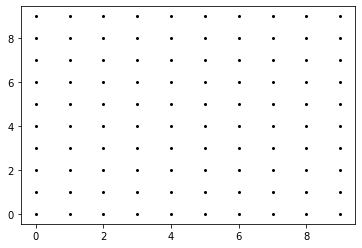

In [16]:
L = 10
a = create(int(L/2))                      #here I want to show just the L x L matrix, ignoring the outer cell
x = [sites[0] for sites in a]
y = [sites[1] for sites in a]
plt.plot(x,y,'o', color='black', markersize=2)
plt.show()

# 1.2
_Justify why the maximum distance for measuring the variance is L/2._

_Calculate the mean variance as a function of r for $L = [50,100,200]$_

We cannot take a distance bigger than L/2 without avoiding repetitions in the choice of the particles. The circle of radius L/2 is the biggest circle that can be inscribed in a square of side L.

In [20]:
start = time.time()
size = [50,100,200]
arrays_var = []
radius = []


for i in range(len(size)):
    a = create(size[i])
    radius.append(radii(size[i],200))
    arrays_var.append(variance(size[i],10000,radius[i],a))
    
    
total = time.time()-start

In [21]:
np.savetxt("arrays.txt", np.array(arrays_var))

In [22]:
print("total execution time: " + str(total) + " s")

total execution time: 1540.1606426239014 s


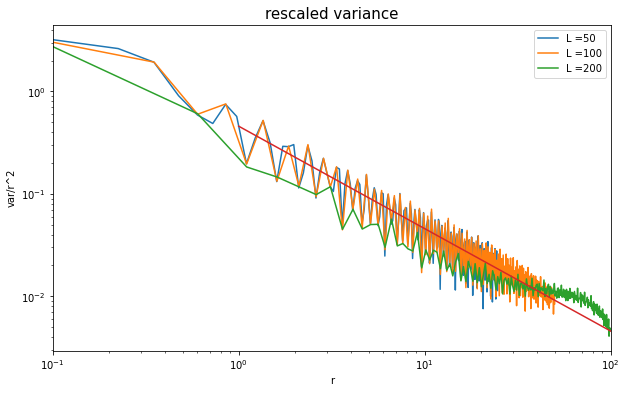

In [26]:
#plot the results in log-log scale
plt.figure(figsize=(10, 6))
ax = plt.subplot(111) 
plt.xlim(0.1, 100) 

for i in range(len(size)):
    plt.plot(radius[i], arrays_var[i], label = 'L =' + str(size[i]))
    plt.xscale('log')
    plt.yscale('log')

x = np.linspace(1, 100, 1000)
plt.plot(x,0.457648/x)
plt.title('rescaled variance', fontsize=15)
plt.xlabel('r')
plt.ylabel('var/r^2')
plt.legend()
plt.savefig("variance.png")

# 1.3
_Comment the results : why do $\frac{\sigma(R)^2}{R^2 }$ goes to a constant at short distance ? What are the reasons of the oscillations of the curve? The straight line corresponds to the asymptotic behavior of variance at long distance. Why do the amplitudes of the oscillations decrease at long distance ?_

To understand the behaviour of the system in the small $R$ limit, we express the variance as a function of $R$: 

\begin{equation}
 \sigma^2 = \langle N^2(R) \rangle - \langle N(R) \rangle^2
\end{equation}

making use of the correspondence : 

\begin{equation}
 \sum_x N(R)*P(x=x_0) \leftrightarrow \sum_N N(R)*P(N(R))
\end{equation}

For small $R$, in particular for $R$ smaller than the lattice spacing, the sum over N reduces to :
\begin{equation}
 \sigma^2 = 0*P(N=0)+1*P(N=1)
\end{equation}

where $P(N(R)=1)$ is given by the ratio between the area of the circle of radius $R$ ($R<1$) and the area of a lattice cell (which in our case is unity). The variance becomes: 
\begin{equation}
 \sigma^2 = \pi*R^2-(\pi*R^2)^2
\end{equation}

Being the last term negligible for small $R$, the last equation explains why $\frac{\sigma^2}{R^2}$ goes to a constant at short distance

In order to understand why the curve oscillate we can think at the simplest case, when the center of the observed circle corresponds to a site of the lattice. Let's distinguish the 2 behaviours determining the oscillation, starting from a maximum of the curve: the decreasing and the subsequent increasing of $\frac{\sigma^2}{R^2}$ for a small increase of R.
The oscillations of the variance of N(R) with respect to its average value over the different centers $x_0$ has to be understood as a consequence of the behaviour of N(R).
In the asymptotical limit at long distances, we know the variance follows an hyperbolic behaviour (linear in the log-log plot) with no oscillations: this is intuitively related to the fact that, for an infinite radius, the precise position of the center we investigate does not matter, since the number of counted particles will always be infinite.
So, a source of oscillation should be the finiteness of the region we are observing.
Also, thinking about the periodic nature of the oscillating behaviour, we can easily remind of the periodicity of the lattice: this should be the other source of oscillation. Indeed, our system has the intrinsic periodicity of the lattice constant (here unitary), and our intuition is that every time R increases by a quantity a, the rescaled variance completes an oscillation.
In order to understand how the presence of this characteristic length affects the count of particles inside a circle, let's visualize the configuration which realises the maximum of N(R) on a single lattice cell: we imagine the arc of the perimeter of the circle is cutting the cell very close to a corner, i.e. a lattice point.
But, increasing R, in order for N(R) to increase too, we have to wait the circle reaches the farther two diagonal corners of the cell, which happens after an increase of the order of a: so, N(R) remains constant while R increases, meaning that the ratio diminishes, until the minimum is reached. 
Then, once R has increased sufficiently for the circle to enclose the other two sites, N(R) will increase and determine the maximum, and so on when a farther cell is reached. 
Then, we can understand the behaviour of the variance considering that the variation of N(R) reflects itself in 
Since this behaviour is periodic, the same line of reasoning is valid when the circle is centered in a point different from a site.

It is observed that at long distance (big values of $R$) the amplitude of the oscillations of $\frac{\sigma^2}{R^2}$ decreases. This occurs since the sudden jumps in the variance (due to the inclusion of new sites within the circle of radius R) increase in amplitude more slowly than R^2.
